In [1]:
import numpy as np
import matplotlib.pyplot as plot

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

Get data and preprocess it

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

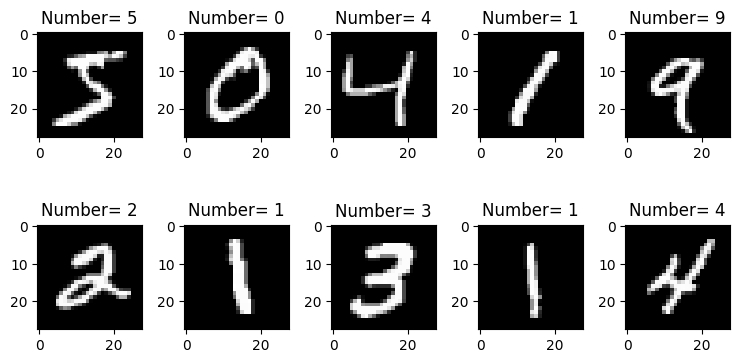

In [3]:
fig, axes = plot.subplots(2, 5, figsize=(1.5*5,2*2))

for i in range (10):
    ax = axes[i//5, i%5]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Number= {}'.format(y_train[i]))

plot.tight_layout()
plot.show()

In [4]:
X_train = X_train.astype(np.float32)/255
X_train = np.expand_dims(X_train, -1)

X_test = X_test.astype(np.float32)/255
X_test = np.expand_dims(X_test, -1)

y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

Model Design

In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

C:\Users\Wilco\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Training and validation

In [6]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

estop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mcheck = ModelCheckpoint('./bestmodel.keras', monitor= 'val_accuracy', verbose=1, save_best_only=True)

callback = [estop, mcheck]

history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, callbacks=callback)

Epoch 1/25
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8446 - loss: 0.4986
Epoch 1: val_accuracy improved from -inf to 0.98175, saving model to ./bestmodel.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8450 - loss: 0.4974 - val_accuracy: 0.9818 - val_loss: 0.0685
Epoch 2/25
1488/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.0978
Epoch 2: val_accuracy improved from 0.98175 to 0.98517, saving model to ./bestmodel.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9699 - loss: 0.0977 - val_accuracy: 0.9852 - val_loss: 0.0537
Epoch 3/25
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9760 - loss: 0.0751
Epoch 3: val_accuracy improved from 0.98517 to 0.98667, saving model to ./bestmodel.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9760 - loss: 0.0751 - val_accuracy: 0.9867 - val_loss: 0.0462
Epoch 4/25
1493/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9819 - loss: 0.0580
Epoch 4: val_accuracy im

Evaluation and testing

In [7]:
model_S = keras.models.load_model("E://Universitieit//Honneurs//Semester 1//ITRI 616//Assignment 4//Assignment Code//bestmodel.keras")

score = model_S.evaluate(X_test, y_test)

print(f" the model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0414
 the model accuracy is 0.989300012588501
